# <font color="#8333ff">P5: Étude de marché</font>

In [1]:
# Import des librairies standards
import numpy as np
print(f"numpy version {np.__version__}")
import pandas as pd
print(f"pandas version {pd.__version__}")

# Pour la visualisation
import seaborn as sns
print(f"seaborn version {sns.__version__}")
import matplotlib.pyplot as plt

# Classe pour standardisation 
from sklearn.preprocessing import StandardScaler
# Pour l'ACP
from sklearn.decomposition import PCA
# Import the hierarchical clustering algorithm
from sklearn.cluster import AgglomerativeClustering

from sklearn import decomposition, preprocessing, metrics

# Dendrogramme
from scipy.cluster.hierarchy import linkage, fcluster 

# Fonctions créées pour ce projet
from functions import *

# Pour afficher toutes les lignes et colonnes des df
pd.set_option('display.max_rows', None, 'display.max_columns', None)

1.14.3
1.0.3
0.8.1


# <font color='#FFCA36'>1. Construction de l'échantillon</font>

## 1.1. Différence de population entre une année antérieure (au choix) et l'année courante, exprimée en pourcentage

J'ai choisi de prendre les années 2013 et 2017 parce que :
- si besoin, je pourrai faire des recoupements avec le projet 3 déjà effectué,
- 2017 est une année assez proche
- 2013 et 2017 ne sont pas trop éloignées, ce qui me semble plus pertinent pour constater le trend.

In [210]:
# Import des données population
pop = pd.read_csv("C:/Users/Zang/Documents/APPRENDER/OPENCLASSROOMS/PARCOURS DA/P5_Etude_de_marche/pop13&17.csv")

In [211]:
pop.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2013,2013,1000 personnes,32269.589,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,36296.113,NaN
2,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2013,2013,1000 personnes,53687.121,NaN
3,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,57009.756,NaN
4,OA,Séries temporelles annuelles,3,Albanie,511,Population totale,3010,Population-Estimations,2013,2013,1000 personnes,2903.790,NaN


In [212]:
# Je garde les colonnes utiles pour plus de lisibilité
pop = pop.drop(["Code Domaine", "Domaine", "Code Élément", "Code Produit", "Produit", "Code année", "Note"], axis=1)

In [213]:
pop.describe(include='all')

,Code zone,Zone,Élément,Année,Unité,Valeur
count,474.000000,474,474,474.000000,474,4.740000e+02
unique,NaN,237,1,NaN,1,NaN
top,NaN,Qatar,Population totale,NaN,1000 personnes,NaN
freq,NaN,2,474,NaN,474,NaN
mean,135.805907,NaN,NaN,2015.000000,NaN,3.720375e+04
std,79.051916,NaN,NaN,2.002113,NaN,1.583227e+05
min,1.000000,NaN,NaN,2013.000000,NaN,7.930000e-01
25%,69.000000,NaN,NaN,2013.000000,NaN,3.824602e+02
50%,134.000000,NaN,NaN,2015.000000,NaN,5.203511e+03
75%,199.000000,NaN,NaN,2017.000000,NaN,1.963509e+04


In [214]:
# Il y a plusieurs occurrences de la Chine
pop[pop.Zone.str.contains("Chine")]

,Code zone,Zone,Élément,Année,Unité,Valeur
82,351,Chine,Population totale,2013,1000 personnes,1422971.062
83,351,Chine,Population totale,2017,1000 personnes,1452625.244
84,96,Chine - RAS de Hong-Kong,Population totale,2013,1000 personnes,7088.778
85,96,Chine - RAS de Hong-Kong,Population totale,2017,1000 personnes,7306.322
86,128,Chine - RAS de Macao,Population totale,2013,1000 personnes,577.372
87,128,Chine - RAS de Macao,Population totale,2017,1000 personnes,622.585
88,41,"Chine, continentale",Population totale,2013,1000 personnes,1391883.330
89,41,"Chine, continentale",Population totale,2017,1000 personnes,1421021.791
90,214,"Chine, Taiwan Province de",Population totale,2013,1000 personnes,23421.582
91,214,"Chine, Taiwan Province de",Population totale,2017,1000 personnes,23674.546


In [215]:
# Je supprime la ligne "Chine" et garde les autres
pop = pop.drop([82,83])

In [216]:
# Vérification de la présence de valeurs nulles
pop.isnull().sum()

Code zone    0
Zone         0
Élément      0
Année        0
Unité        0
Valeur       0
dtype: int64

In [91]:
pop.head()

,Code zone,Zone,Élément,Année,Unité,Valeur
0,2,Afghanistan,Population totale,2013,1000 personnes,32269.589
1,2,Afghanistan,Population totale,2017,1000 personnes,36296.113
2,202,Afrique du Sud,Population totale,2013,1000 personnes,53687.121
3,202,Afrique du Sud,Population totale,2017,1000 personnes,57009.756
4,3,Albanie,Population totale,2013,1000 personnes,2903.790


In [217]:
# Je créé la colonne population
pop['population'] = (pop['Valeur'] * 1000).astype(int)

In [218]:
pop.head()

,Code zone,Zone,Élément,Année,Unité,Valeur,population
0,2,Afghanistan,Population totale,2013,1000 personnes,32269.589,32269589
1,2,Afghanistan,Population totale,2017,1000 personnes,36296.113,36296113
2,202,Afrique du Sud,Population totale,2013,1000 personnes,53687.121,53687121
3,202,Afrique du Sud,Population totale,2017,1000 personnes,57009.756,57009755
4,3,Albanie,Population totale,2013,1000 personnes,2903.790,2903790


In [219]:
# Transformation de temp en table pivot
pop = pop.pivot_table(
    index=["Code zone","Zone"],
    columns = ["Année"],
    values=["population"], 
    aggfunc=sum)

In [220]:
# On renomme les colonnes
pop.columns = ['pop_2013','pop_2017']

In [221]:
# Suppression de l'index
pop = pop.reset_index()

In [222]:
pop.shape

(236, 4)

In [223]:
# Calcul de l'évolution de la population entre 2017 et 2013
pop['ratio_evol_pop'] = (pop['pop_2017'] - pop['pop_2013']) / pop['pop_2013']

In [224]:
pop.head()

,Code zone,Zone,pop_2013,pop_2017,ratio_evol_pop
0,1,Arménie,2897587,2944790,0.016290
1,2,Afghanistan,32269589,36296113,0.124778
2,3,Albanie,2903790,2884169,-0.006757
3,4,Algérie,38140133,41389189,0.085187
4,5,Samoa américaines,55713,55620,-0.001669


In [225]:
# Exemple : la France
pop[pop["Zone"]=='France']

,Code zone,Zone,pop_2013,pop_2017,ratio_evol_pop
58,68,France,63893525,64842509,0.014853


In [226]:
# Vérification si doublons
pop.duplicated().sum()

0

In [227]:
# Enregistrement
pop.to_csv('C:/Users/Zang/Documents/APPRENDER/OPENCLASSROOMS/PARCOURS DA/P5_Etude_de_marche/pop18b.csv', index=False)

In [2]:
# Chargement des données (si besoin)
pop = pd.read_csv('C:/Users/Zang/Documents/APPRENDER/OPENCLASSROOMS/PARCOURS DA/P5_Etude_de_marche/pop18b.csv')

## Préparation des autres données

In [228]:
# Import des données des bilans alimentaires 2017 
veg = pd.read_csv("C:/Users/Zang/Documents/APPRENDER/OPENCLASSROOMS/PARCOURS DA/P5_Etude_de_marche/2017ani.csv")
ani = pd.read_csv("C:/Users/Zang/Documents/APPRENDER/OPENCLASSROOMS/PARCOURS DA/P5_Etude_de_marche/2017veg.csv")

In [229]:
# Ajout de la variable origin
ani["origin"] = "animal"
veg["origin"] = "vegetal"

In [230]:
# On regroupe veg et ani en un unique dataframe, via une union
temp = ani.append(veg)

In [231]:
# Suppression de ani et veg
del ani, veg

In [232]:
# On renomme les colonnes de temp
temp.columns = ["xx","xx2","country_code","country",'xx3','element','item_code','item','xx4',"year","unit","value"
                ,'origin']

In [233]:
temp.head()

,xx,xx2,country_code,country,xx3,element,item_code,item,xx4,year,unit,value,origin
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2511,Blé,2017,2017,Kcal/personne/jour,1331.00,animal
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,2511,Blé,2017,2017,g/personne/jour,35.88,animal
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2805,Riz (Eq Blanchi),2017,2017,Kcal/personne/jour,135.00,animal
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,2805,Riz (Eq Blanchi),2017,2017,g/personne/jour,2.58,animal
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2513,Orge,2017,2017,Kcal/personne/jour,5.00,animal


In [234]:
# Transformation de temp en table pivot
data = temp.pivot_table(index=["country_code","country","item_code","item","year","origin"],
                        columns = ["element"], 
                        values=["value"],
                        aggfunc=sum)

In [24]:
data.head()

value  \
element                                           Disponibilité alimentaire (Kcal/personne/jour)   
country_code country item_code item   year origin                                                  
1            Arménie 2511      Blé    2017 animal                                         1053.0   
                     2513      Orge   2017 animal                                            4.0   
                     2514      Maïs   2017 animal                                           68.0   
                     2515      Seigle 2017 animal                                            1.0   
                     2516      Avoine 2017 animal                                            7.0   

                                                                                                            
element                                           Disponibilité de protéines en quantité (g/personne/jour)  
country_code country item_code item   year origin                                                           
1            Arménie 2511      Blé    2017 animal                                              31.35        
                     2513      Orge   2017 animal                                               0.15        
                     2514      Maïs   2017 animal                                               2.64        
                     2515      Seigle 2017 animal                                               0.03        
                     2516      Avoine 2017 animal                                               0.26

In [235]:
# Suppression de temp
del temp

In [236]:
# On renomme les colonnes
data.columns = ['dispo_ALI_(kcal/pers/j)', 'dispo_PROT_(g/pers/j)']

In [237]:
data = data.reset_index()

In [109]:
data.head()

,country_code,country,item_code,item,year,origin,dispo_ALI_(kcal/pers/j),dispo_PROT_(g/pers/j)
0,1,Arménie,2511,Blé,2017,animal,1053.0,31.35
1,1,Arménie,2513,Orge,2017,animal,4.0,0.15
2,1,Arménie,2514,Maïs,2017,animal,68.0,2.64
3,1,Arménie,2515,Seigle,2017,animal,1.0,0.03
4,1,Arménie,2516,Avoine,2017,animal,7.0,0.26


In [110]:
data.shape

(14602, 8)

## 1.2. Disponibilité alimentaire en calories par habitant

In [252]:
# le gb suivant celui-ci est préférable
# groupby sur dispo ali
# dalcal = data.groupby(['country_code']).sum().filter(['dispo ALI (kcal/pers/j)'])

In [238]:
# Je créé un df 
dalcal = data.groupby(['country_code', 'country']).agg({'dispo_ALI_(kcal/pers/j)':'sum'}).reset_index()

In [239]:
dalcal.head()

,country_code,country,dispo_ALI_(kcal/pers/j)
0,1,Arménie,3072.0
1,2,Afghanistan,1997.0
2,3,Albanie,3400.0
3,4,Algérie,3345.0
4,7,Angola,2266.0


In [240]:
dalcal.shape

(173, 3)

In [241]:
# Il y a plus de lignes dans pop, je vérifie pourquoi
verifc = pd.merge(dalcal, pop, left_on='country_code', right_on='Code zone', how='outer')

In [242]:
verifc.isnull().sum()

country_code               64
country                    64
dispo_ALI_(kcal/pers/j)    64
Code zone                   1
Zone                        1
pop_2013                    1
pop_2017                    1
ratio_evol_pop              1
dtype: int64

In [243]:
# Recherche des valeurs nulles
verifc[verifc['country'].isnull()]

,country_code,country,dispo_ALI_(kcal/pers/j),Code zone,Zone,pop_2013,pop_2017,ratio_evol_pop
173,NaN,NaN,NaN,5.0,Samoa américaines,55713.0,55620.0,-0.001669
174,NaN,NaN,NaN,6.0,Andorre,80774.0,77001.0,-0.046711
175,NaN,NaN,NaN,13.0,Bahreïn,1315027.0,1494076.0,0.136156
176,NaN,NaN,NaN,17.0,Bermudes,64386.0,63049.0,-0.020765
177,NaN,NaN,NaN,18.0,Bhoutan,710237.0,745563.0,0.049738
178,NaN,NaN,NaN,22.0,Aruba,103158.0,105366.0,0.021404
179,NaN,NaN,NaN,26.0,Brunéi Darussalam,404421.0,424473.0,0.049582
180,NaN,NaN,NaN,29.0,Burundi,9540291.0,10827018.0,0.134873
181,NaN,NaN,NaN,36.0,Îles Caïmanes,59931.0,63382.0,0.057583
182,NaN,NaN,NaN,45.0,Comores,741505.0,813891.0,0.097620


Ce sont des pays / régions pour lesquels il n'y a pas de données de dispo ali. L'autre valeur nulle correspond à l'occurrence Chine supprimée de la table pop. 

## 1.3. Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays

### Calcul de la dispo de protéine par pays, en g/pers/j

In [244]:
# groupby par pays
dispoprotpays = data.groupby(['country_code', 'country']).agg({'dispo_PROT_(g/pers/j)':'sum'}).reset_index()

In [245]:
dispoprotpays.head()

,country_code,country,dispo_PROT_(g/pers/j)
0,1,Arménie,97.33
1,2,Afghanistan,54.09
2,3,Albanie,119.50
3,4,Algérie,92.85
4,7,Angola,54.09


Par ex. en Arménie la dispo en protéines est de 97.33 g / j. 

In [35]:
# Je vérifie la cohérence globale : 
dispoprotpays.describe(include="all")

,country_code,country,dispo_PROT_(g/pers/j)
count,173.000000,173,173.000000
unique,NaN,173,NaN
top,NaN,Autriche,NaN
freq,NaN,1,NaN
mean,127.936416,NaN,81.309422
std,74.736526,NaN,20.198481
min,1.000000,NaN,39.910000
25%,67.000000,NaN,64.270000
50%,122.000000,NaN,81.630000
75%,189.000000,NaN,96.970000


In [246]:
dispoprotpays.shape

(173, 3)

### Calcul de la proportion en protéines animales par pays

In [247]:
data.head()

,country_code,country,item_code,item,year,origin,dispo_ALI_(kcal/pers/j),dispo_PROT_(g/pers/j)
0,1,Arménie,2511,Blé,2017,animal,1053.0,31.35
1,1,Arménie,2513,Orge,2017,animal,4.0,0.15
2,1,Arménie,2514,Maïs,2017,animal,68.0,2.64
3,1,Arménie,2515,Seigle,2017,animal,1.0,0.03
4,1,Arménie,2516,Avoine,2017,animal,7.0,0.26


In [248]:
# Je créé un df et commence par sélectionner origin = animal : 
dataani = data[data['origin']=='animal']

In [249]:
dataani.head()

,country_code,country,item_code,item,year,origin,dispo_ALI_(kcal/pers/j),dispo_PROT_(g/pers/j)
0,1,Arménie,2511,Blé,2017,animal,1053.0,31.35
1,1,Arménie,2513,Orge,2017,animal,4.0,0.15
2,1,Arménie,2514,Maïs,2017,animal,68.0,2.64
3,1,Arménie,2515,Seigle,2017,animal,1.0,0.03
4,1,Arménie,2516,Avoine,2017,animal,7.0,0.26


In [250]:
dataani.shape

(10868, 8)

In [251]:
# Je renomme la colonne dispo PROT (g/pers/j) en signalant l'origine animale
dataani = dataani.rename(columns={"dispo_PROT_(g/pers/j)": "dispo_PROT_ANIMALES_(g/pers/j)"})

In [252]:
dataani.head()

,country_code,country,item_code,item,year,origin,dispo_ALI_(kcal/pers/j),dispo_PROT_ANIMALES_(g/pers/j)
0,1,Arménie,2511,Blé,2017,animal,1053.0,31.35
1,1,Arménie,2513,Orge,2017,animal,4.0,0.15
2,1,Arménie,2514,Maïs,2017,animal,68.0,2.64
3,1,Arménie,2515,Seigle,2017,animal,1.0,0.03
4,1,Arménie,2516,Avoine,2017,animal,7.0,0.26


In [253]:
# Calcul de la dispo de protéines ANIMALES selon les pays, en g/pers/j
protani = dataani.groupby(['country_code', 'country']).agg({'dispo_PROT_ANIMALES_(g/pers/j)':'sum'}).reset_index()

In [254]:
protani.head()

,country_code,country,dispo_PROT_ANIMALES_(g/pers/j)
0,1,Arménie,52.77
1,2,Afghanistan,43.53
2,3,Albanie,53.18
3,4,Algérie,67.15
4,7,Angola,37.62


In [255]:
# Vérification de la cohérence 
protani.describe(include='all')

,country_code,country,dispo_PROT_ANIMALES_(g/pers/j)
count,173.000000,173,173.000000
unique,NaN,173,NaN
top,NaN,République démocratique populaire lao,NaN
freq,NaN,1,NaN
mean,127.936416,NaN,44.409942
std,74.736526,NaN,9.583618
min,1.000000,NaN,19.370000
25%,67.000000,NaN,37.950000
50%,122.000000,NaN,43.230000
75%,189.000000,NaN,48.880000


In [256]:
protani.shape

(173, 3)

In [257]:
del dataani

### Jointure des tableaux dispoprotpays avec protani pour avoir la dispo en protéines (g/pers/j) et en protéines animales (g/pers/j) selon les pays

In [258]:
disprotani = pd.merge(dispoprotpays, protani)

In [259]:
del dispoprotpays, protani

In [128]:
disprotani.head()

,country_code,country,dispo_PROT_(g/pers/j),dispo_PROT_ANIMALES_(g/pers/j)
0,1,Arménie,97.33,52.77
1,2,Afghanistan,54.09,43.53
2,3,Albanie,119.50,53.18
3,4,Algérie,92.85,67.15
4,7,Angola,54.09,37.62


In [129]:
disprotani.shape

(173, 4)

In [260]:
# Création de la colonne proportion de protéines animales : 
disprotani['prop_prot_animales'] = disprotani['dispo_PROT_ANIMALES_(g/pers/j)'] / disprotani['dispo_PROT_(g/pers/j)']

In [47]:
disprotani.head()

,country_code,country,dispo_PROT_(g/pers/j),dispo_PROT_ANIMALES_(g/pers/j),prop_prot_animales
0,1,Arménie,97.33,52.77,0.542176
1,2,Afghanistan,54.09,43.53,0.804770
2,3,Albanie,119.50,53.18,0.445021
3,4,Algérie,92.85,67.15,0.723209
4,7,Angola,54.09,37.62,0.695507


### Jointure avec pop

In [261]:
# Je créé un nouveau dataframe 
disprotanip = pd.merge(pop, disprotani, left_on='Code zone', right_on='country_code')

In [262]:
disprotanip.head()

,Code zone,Zone,pop_2013,pop_2017,ratio_evol_pop,country_code,country,dispo_PROT_(g/pers/j),dispo_PROT_ANIMALES_(g/pers/j),prop_prot_animales
0,1,Arménie,2897587,2944790,0.016290,1,Arménie,97.33,52.77,0.542176
1,2,Afghanistan,32269589,36296113,0.124778,2,Afghanistan,54.09,43.53,0.804770
2,3,Albanie,2903790,2884169,-0.006757,3,Albanie,119.50,53.18,0.445021
3,4,Algérie,38140133,41389189,0.085187,4,Algérie,92.85,67.15,0.723209
4,7,Angola,26015781,29816766,0.146103,7,Angola,54.09,37.62,0.695507


In [263]:
disprotanip.shape

(172, 10)

Le df disprotani comprend 1 lignes de plus (173) : l'occurrence de la Chine retirée au départ. 

In [264]:
# Je supprime les colonnes devenues inutiles : 
disprotanip = disprotanip.drop(["pop_2013", "pop_2017", "country_code", "country", "dispo_PROT_ANIMALES_(g/pers/j)"], axis=1)

In [265]:
del pop

## 1.4. Disponibilité alimentaire en calories par habitant

In [266]:
data = pd.merge(disprotanip, dalcal, left_on='Code zone', right_on='country_code')

In [267]:
data.head()

,Code zone,Zone,ratio_evol_pop,dispo_PROT_(g/pers/j),prop_prot_animales,country_code,country,dispo_ALI_(kcal/pers/j)
0,1,Arménie,0.016290,97.33,0.542176,1,Arménie,3072.0
1,2,Afghanistan,0.124778,54.09,0.804770,2,Afghanistan,1997.0
2,3,Albanie,-0.006757,119.50,0.445021,3,Albanie,3400.0
3,4,Algérie,0.085187,92.85,0.723209,4,Algérie,3345.0
4,7,Angola,0.146103,54.09,0.695507,7,Angola,2266.0


In [268]:
data.shape

(172, 8)

In [269]:
# Suppression des colonnes inutiles
data = data.drop(['country_code', 'country'], axis=1)

In [270]:
data.head()

,Code zone,Zone,ratio_evol_pop,dispo_PROT_(g/pers/j),prop_prot_animales,dispo_ALI_(kcal/pers/j)
0,1,Arménie,0.016290,97.33,0.542176,3072.0
1,2,Afghanistan,0.124778,54.09,0.804770,1997.0
2,3,Albanie,-0.006757,119.50,0.445021,3400.0
3,4,Algérie,0.085187,92.85,0.723209,3345.0
4,7,Angola,0.146103,54.09,0.695507,2266.0


In [271]:
data.shape

(172, 6)

In [272]:
del disprotani, disprotanip

## 1.5. Ajout de la variable PIB par habitant

In [273]:
# Import des données PIB 2017 (source FAO) 
pib = pd.read_csv("C:/Users/Zang/Documents/APPRENDER/OPENCLASSROOMS/PARCOURS DA/P5_Etude_de_marche/pibparhbt17.csv")

In [274]:
# Je garde les colonnes utiles pour plus de lisibilité
pib = pib.drop(["Code Domaine", "Domaine", "Code Élément", "Élément", "Code Produit", "Code année",
               "Année", "Unité", "Note"], axis=1)

In [275]:
pib = pib.pivot_table(index=["Code zone","Zone"], columns = ["Produit"], 
values=["Valeur"])

In [276]:
# On renomme les colonnes
pib.columns = ['PIB_par_hbt_(US$)']

In [277]:
pib.reset_index(inplace=True)

In [278]:
pib.describe()

,Code zone,PIB_par_hbt_(US$)
count,212.000000,212.000000
mean,132.004717,16689.337040
std,78.240454,25254.910206
min,1.000000,101.563368
25%,65.250000,2034.606833
50%,129.500000,6272.656494
75%,195.250000,19936.878512
max,351.000000,172799.804725


In [279]:
# Jointure avec le df global
data = pd.merge(data, pib, how='left')

In [280]:
data.shape

(172, 7)

In [281]:
# Recherche de valeurs nulles
data.isnull().sum()

Code zone                  0
Zone                       0
ratio_evol_pop             0
dispo_PROT_(g/pers/j)      0
prop_prot_animales         0
dispo_ALI_(kcal/pers/j)    0
PIB_par_hbt_(US$)          1
dtype: int64

In [282]:
data[data['PIB_par_hbt_(US$)'].isnull()]

,Code zone,Zone,ratio_evol_pop,dispo_PROT_(g/pers/j),prop_prot_animales,dispo_ALI_(kcal/pers/j),PIB_par_hbt_(US$)
145,214,"Chine, Taiwan Province de",0.0108,85.71,0.504609,2976.0,NaN


Le PIB par hbt de Taiwan est au niveau de celui du Danemark (info trouvée sur Wikipedia et vraisemblable en croisant plusieurs sources).

In [284]:
data.loc[data['Zone']=='Chine, Taiwan Province de', 'PIB_par_hbt_(US$)'] = 57500

In [285]:
# Vérification au hasard
data.sample(1)

,Code zone,Zone,ratio_evol_pop,dispo_PROT_(g/pers/j),prop_prot_animales,dispo_ALI_(kcal/pers/j),PIB_par_hbt_(US$)
96,136,Mauritanie,0.121828,79.82,0.631295,2842.0,1597.806534


In [286]:
del pib

In [287]:
# Enregistrement
data.to_csv('C:/Users/Zang/Documents/APPRENDER/OPENCLASSROOMS/PARCOURS DA/P5_Etude_de_marche/data18b.csv', index=False)

In [2]:
# Import (si besoin)
data = pd.read_csv('C:/Users/Zang/Documents/APPRENDER/OPENCLASSROOMS/PARCOURS DA/P5_Etude_de_marche/data18b.csv')

# Le tableau est complet ! 

In [288]:
# 1ère ligne pour mémoire
data.head(1)

,Code zone,Zone,ratio_evol_pop,dispo_PROT_(g/pers/j),prop_prot_animales,dispo_ALI_(kcal/pers/j),PIB_par_hbt_(US$)
0,1,Arménie,0.01629,97.33,0.542176,3072.0,3933.682101


In [289]:
data.shape

(172, 7)

# <font color='#FFCA36'>2. Classification ascendante hiérarchique</font>

## Construction du dendrogramme

### Nettoyage et standardisation des données

cf. https://openclassrooms.com/fr/courses/5869986-perform-an-exploratory-data-analysis/6177871-analyze-the-results-of-a-hierarchical-clustering

In [3]:
# Copie du df principal, sans la colonne "code zone" 
X = data.drop('Code zone',axis=1).set_index('Zone')

In [291]:
X.head()

,ratio_evol_pop,dispo_PROT_(g/pers/j),prop_prot_animales,dispo_ALI_(kcal/pers/j),PIB_par_hbt_(US$)
Zone,,,,,
Arménie,0.016290,97.33,0.542176,3072.0,3933.682101
Afghanistan,0.124778,54.09,0.804770,1997.0,605.557362
Albanie,-0.006757,119.50,0.445021,3400.0,4445.132198
Algérie,0.085187,92.85,0.723209,3345.0,4051.244377
Angola,0.146103,54.09,0.695507,2266.0,4100.291004


##### Centrage et réduction puis calcul des composantes principales

In [6]:
# Classe pour standardisation 
# from sklearn.preprocessing import StandardScaler

In [4]:
# Centrage-réduction
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

-----------------------------------

##### Vérifions, par acquis de conscience, les propriétés du nouvel ensemble de données. 

In [293]:
# Les moyennes sont maintenant nulles (aux erreurs de troncature près) :
np.mean(X_scaled, axis=0)

array([ 2.06553121e-17,  3.82123274e-16, -2.94338197e-16, -2.99502025e-16,
        1.80733981e-17])

In [294]:
# Et les écarts-type unitaires.
np.std(X_scaled, axis = 0)

array([1., 1., 1., 1., 1.])

Text(0.5,1,'Visualisation après standardisation')

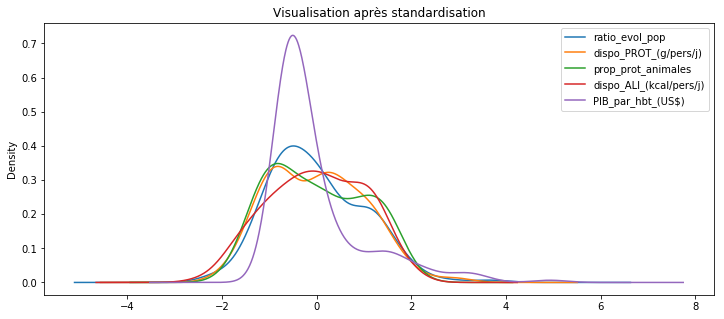

In [295]:
# Autre vérification : visualisation après standardisation (all variables have a mean of 0 and a standard deviation of 1)
pd.DataFrame(X_scaled, columns = X.columns).plot(kind='density', sharex=True, figsize=(12,5), layout=(10,1))
plt.title('Visualisation après standardisation')
# plt.savefig('fig1.jpeg')

-----------------

### Dendrogramme

In [5]:
from scipy.cluster.hierarchy import linkage, fcluster 

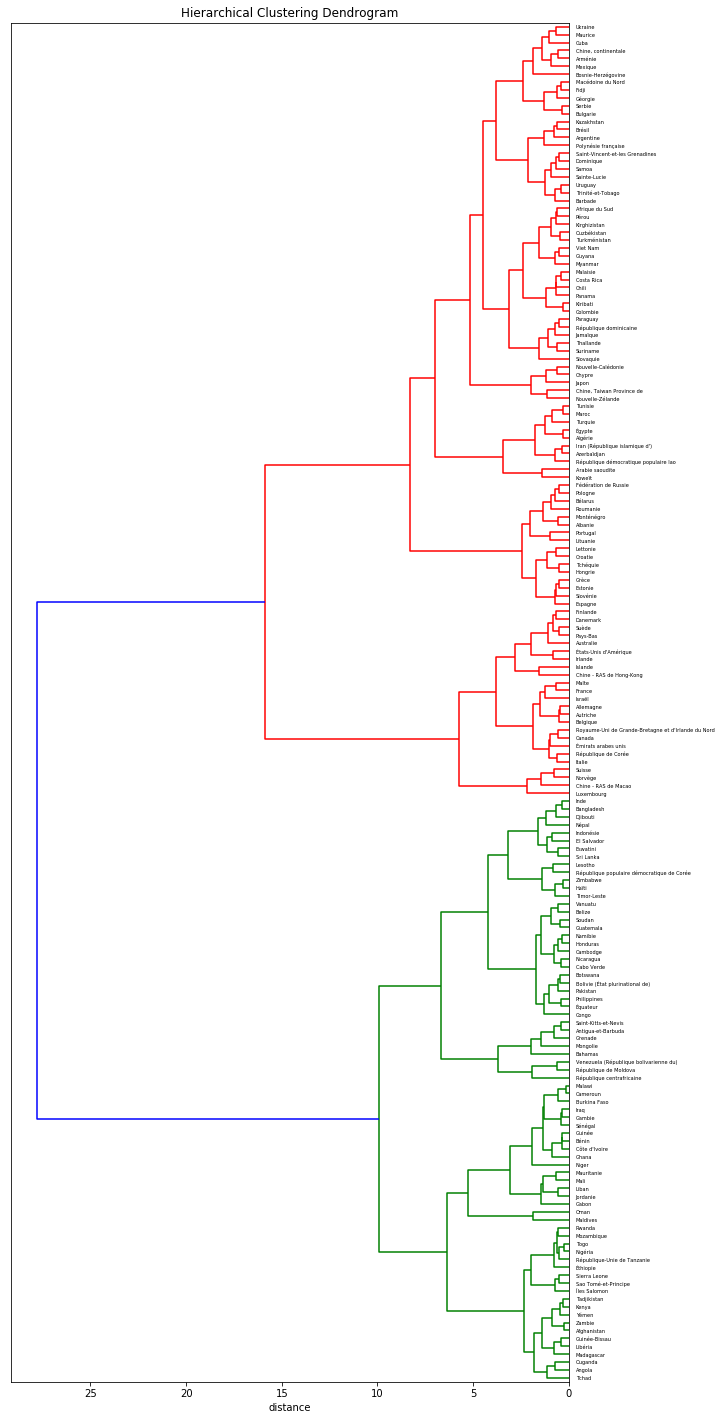

In [6]:
# Clustering hiérarchique
Z = linkage(X_scaled, 'ward')
names = X.index 
# Affichage du dendrogramme
plot_dendrogram(Z, names)

# plt.savefig('fig2.jpeg')

In [7]:
# Coupage du dendrogramme en 5 clusters
clusters = fcluster(Z, 5, criterion='maxclust')

In [300]:
# Exploration des différents cluters
for i in range(1,6):
    print(f"Group {i}:")
    print(", ".join(X.index[clusters == i].sort_values())) 
    print(" ")

Group 1:
Afghanistan, Angola, Burkina Faso, Bénin, Cameroun, Côte d'Ivoire, Gabon, Gambie, Ghana, Guinée, Guinée-Bissau, Iraq, Jordanie, Kenya, Liban, Libéria, Madagascar, Malawi, Maldives, Mali, Mauritanie, Mozambique, Niger, Nigéria, Oman, Ouganda, Rwanda, République-Unie de Tanzanie, Sao Tomé-et-Principe, Sierra Leone, Sénégal, Tadjikistan, Tchad, Togo, Yémen, Zambie, Éthiopie, Îles Salomon
 
Group 2:
Antigua-et-Barbuda, Bahamas, Bangladesh, Belize, Bolivie (État plurinational de), Botswana, Cabo Verde, Cambodge, Congo, Djibouti, El Salvador, Eswatini, Grenade, Guatemala, Haïti, Honduras, Inde, Indonésie, Lesotho, Mongolie, Namibie, Nicaragua, Népal, Pakistan, Philippines, République centrafricaine, République de Moldova, République populaire démocratique de Corée, Saint-Kitts-et-Nevis, Soudan, Sri Lanka, Timor-Leste, Vanuatu, Venezuela (République bolivarienne du), Zimbabwe, Équateur
 
Group 3:
Allemagne, Australie, Autriche, Belgique, Canada, Chine - RAS de Hong-Kong, Chine - RAS 

In [174]:
# Taille des clusters
X_c["cluster"].value_counts()

5    58
1    38
2    36
3    24
4    16
Name: cluster, dtype: int64

In [8]:
# Ajout des clusters au df principal (je fais une copie X_c c-à-d X clustered)
X_c = X.copy()
X_c['cluster'] = clusters
X_c.head()

,ratio_evol_pop,dispo_PROT_(g/pers/j),prop_prot_animales,dispo_ALI_(kcal/pers/j),PIB_par_hbt_(US$),cluster
Zone,,,,,,
Arménie,0.016290,97.33,0.542176,3072.0,3933.682101,5
Afghanistan,0.124778,54.09,0.804770,1997.0,605.557362,1
Albanie,-0.006757,119.50,0.445021,3400.0,4445.132198,4
Algérie,0.085187,92.85,0.723209,3345.0,4051.244377,5
Angola,0.146103,54.09,0.695507,2266.0,4100.291004,1


##### Calcul des moyennes de chaque cluster

In [9]:
X_c.groupby('cluster').mean()

,ratio_evol_pop,dispo_PROT_(g/pers/j),prop_prot_animales,dispo_ALI_(kcal/pers/j),PIB_par_hbt_(US$)
cluster,,,,,
1,0.124917,62.425789,0.753536,2451.973684,2321.062882
2,0.054478,64.643889,0.624266,2433.972222,4732.389461
3,0.033161,110.044583,0.396816,3450.375000,54144.962421
4,-0.011454,103.566875,0.427069,3335.625000,15341.566329
5,0.036157,85.649655,0.536188,3011.500000,10955.881915


**Ce que l'on constate (grandes lignes) :**

- Groupe 1 : pays pauvres et/ou dans des situations géopolitiques complexes (Afghanistan, Iraq).
- Groupe 2 : pays pauvres et/ou dans des situations économiques difficiles (Vénézuela, Zimbabwe).
- Groupe 3 : pays riches (France, USA).  
- Groupe 4 : pays un peu moins riches que ceux du groupe 3, forte représentation de l'Europe de l'Est et du Sud. 
- Groupe 5 : groupe visiblement le plus mélangés à la fois au niveau des richesses (Koweit, Suriname) et géographique. 

A priori, on peut déjà se dire que les groupes 1 et 2 seront peu intéressants pour notre projet.  
Idem pour les pays du groupe 3 (pays riches déjà pourvus, forte concurrence à prévoir).    

Resteront probablement **les groupes 4 et 5.** 

In [10]:
# Enregistrement
X_c.to_csv('C:/Users/Zang/Documents/APPRENDER/OPENCLASSROOMS/PARCOURS DA/P5_Etude_de_marche/X_c18b.csv')

In [17]:
# Import
X_c = pd.read_csv('C:/Users/Zang/Documents/APPRENDER/OPENCLASSROOMS/PARCOURS DA/P5_Etude_de_marche/X_c18b.csv')

# <font color='#FFCA36'>3. ACP</font>

## Éboulis des valeurs propres

In [302]:
# Choix du nombre de composantes à calculer 
n_comp = len(X.columns)

In [303]:
# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

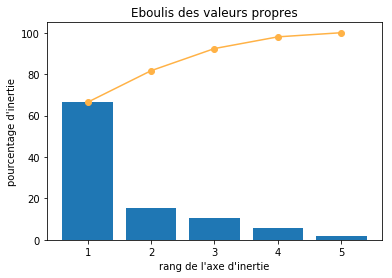

Pourcentage de variance expliquée : [66.43 15.23 10.7   5.65  2.  ]
Pourcentage de variance expliquée (somme cumulative) : [ 66.43  81.66  92.36  98.   100.  ]


In [304]:
# Ébouli des valeurs propres
display_scree_plot(pca) 
print(f"Pourcentage de variance expliquée :", np.around((pca.explained_variance_ratio_ * 100), 2))
print(f"Pourcentage de variance expliquée (somme cumulative) :", np.around((pca.explained_variance_ratio_.cumsum() * 100), 2))

# plt.savefig('fig3.jpeg')

La première composante accapare 2/3 de l’information disponible. Nous disposons de plus de 80 % avec les deux premiers
facteurs. 

_**Rappel du critère de Kaiser** : on a tendance à ne pas considérer comme importants les axes dont l’inertie associée est inférieure à (100/p)% p étant le nombre d'axes.  
Ici 100/p = 100/5 = 20%.  
Sachant qu'en pratique, on retient en fait les axes que l’on sait interpréter._

---

##### --- Représentation des variables sur PC1 : ---

In [305]:
# Je récupère l'info
pc1 = pca.components_[0] # 1er plan factoriel
pc2 = pca.components_[1] # 1er plan factoriel
# Rappel des variables
print(X.columns)
# Score de représentation des variables sur PC1 : 
print(f'pc1 : {pc1}')
print(f'pc2 : {pc2}')

Index(['ratio_evol_pop', 'dispo_PROT_(g/pers/j)', 'prop_prot_animales',
       'dispo_ALI_(kcal/pers/j)', 'PIB_par_hbt_(US$)'],
      dtype='object')
pc1 : [-0.35748787  0.50592575 -0.4624682   0.4774803   0.41758506]
pc2 : [0.82316341 0.10939491 0.04436255 0.06051908 0.55209071]


Dispo prot, prop prot ani (-) et dispo ali sont les variables qui contribuent le plus à PC1.   
ratio evol pop, dispo ali et PIB contribuent le plus à PC2.     
Vérifions ces informations avec le cercle des corrélations. 

---

## Représentations graphiques des individus et des variables

### Cercle des corrélations

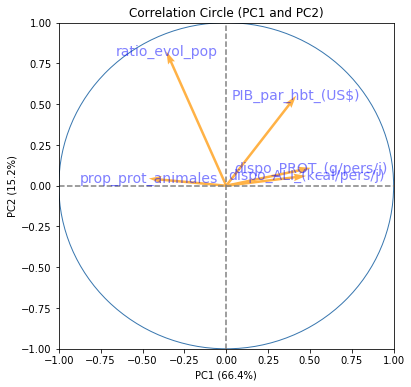

In [306]:
pcs = pca.components_ 
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(X.columns))

# plt.savefig('fig4.jpeg')

#### Analyse

- La première composante résume bien les informations liés à l'alimentation. Les pays les "mieux nourris" se trouvent à droite. Cela correspond aux pays des groupes 3 puis 4 et 5. 
- En revanche, la prop prot ani semble décorrélée des dispo ali. 
- Le ratio evol pop contribue bp à la 2ème composante (pays du groupe 1 en particulier). 

### Projection des individus sur le premier plan factoriel

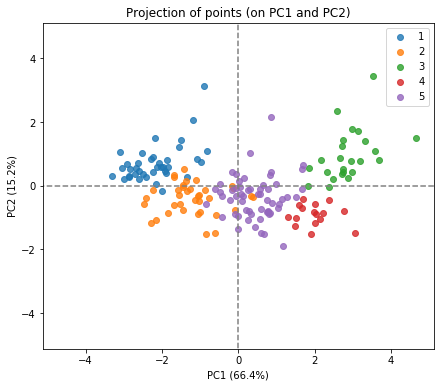

In [308]:
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var = X_c.cluster, alpha = 0.8)

# plt.savefig('fig5.jpeg')

#### Projection des centroides

In [309]:
# Ajout des clusters dans le df principal (celui réalisé après centrage - réduction) : 
X_scaled_clustered = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled_clustered['cluster'] = clusters
X_scaled_clustered.head()

,ratio_evol_pop,dispo_PROT_(g/pers/j),prop_prot_animales,dispo_ALI_(kcal/pers/j),PIB_par_hbt_(US$),cluster
Zone,,,,,,
Arménie,-0.769037,0.801236,-0.193584,0.471303,-0.526562,5
Afghanistan,1.400016,-1.345708,1.453251,-1.900608,-0.697596,1
Albanie,-1.229840,1.902016,-0.802885,1.195012,-0.500278,4
Algérie,0.608461,0.578796,0.941752,1.073659,-0.520520,5
Angola,1.826388,-1.345708,0.768021,-1.307078,-0.518000,1


In [310]:
# Je crée un nouveau df pour avoir les centroides
Xscm = X_scaled_clustered.groupby('cluster').mean()
Xscm.head()

,ratio_evol_pop,dispo_PROT_(g/pers/j),prop_prot_animales,dispo_ALI_(kcal/pers/j),PIB_par_hbt_(US$)
cluster,,,,,
1,1.402811,-0.931821,1.131940,-0.896741,-0.609435
2,-0.005538,-0.821688,0.321233,-0.936459,-0.485516
3,-0.431732,1.432537,-1.105197,1.306161,2.053825
4,-1.323756,1.110908,-0.915466,1.052973,0.059696
5,-0.371824,0.221286,-0.231137,0.337815,-0.165687


-----------------

##### --- Heatmap (pour voir) ---

[Text(0.5,0,'ratio_evol_pop'),
 Text(1.5,0,'dispo_PROT_(g/pers/j)'),
 Text(2.5,0,'prop_prot_animales'),
 Text(3.5,0,'dispo_ALI_(kcal/pers/j)'),
 Text(4.5,0,'PIB_par_hbt_(US$)')]

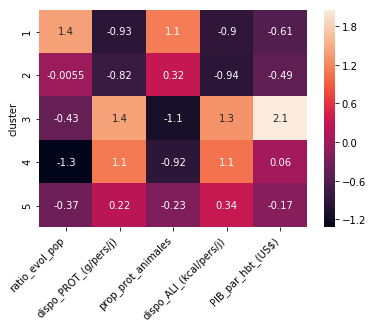

In [311]:
ax = sns.heatmap(Xscm, annot=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

# plt.savefig('fig6.jpeg')

Grâce à cette heatmap, on visualise bien les différences entre clusters en fonction des variables. 

--------

#### Coordonnées des centroides

In [312]:
# Calcul des coordonnées des centroides sur le premier plan factoriel.
# Je pars du df principal après centrage - réduction et calcul des moyennes par cluster, 
# ce qui me donne les coordonnées des centroides
Xscm_p = pca.transform(Xscm)

In [313]:
Xscm_p

array([[-2.17907344,  0.71228877, -0.18987548,  0.02661335,  0.02313702],
       [-1.21217871, -0.40491906,  0.50106936, -0.06695923,  0.04673869],
       [ 2.87152777,  0.96524251,  0.18313164, -0.41392967,  0.04506244],
       [ 1.98633968, -0.91206943, -0.3259308 ,  0.22543625,  0.04870047],
       [ 0.44388143, -0.36314821, -0.17247405,  0.1332165 , -0.0762501 ]])

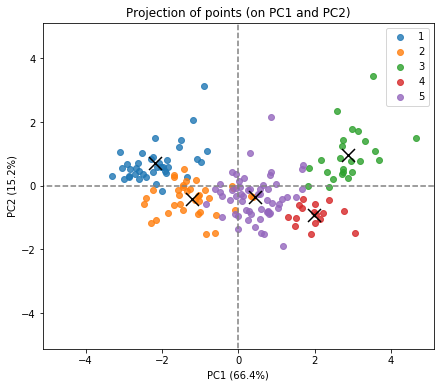

In [314]:
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var = X_c.cluster, alpha = 0.8)
plt.scatter(Xscm_p[:, 0], Xscm_p[:, 1],
            marker='x', s=169, linewidths=3,
            color='k', zorder=10)

# plt.savefig('fig7.jpeg')

##### Export des centroides centrés réduits + composantes principales

In [315]:
# Centroides centrés réduits
Xscm
display(Xscm)

# df des centroides projetés
cent_proj = [
    'PC1',
    'PC2',
    'PC3',
    'PC4',
    'PC5',
]
temp_c = pd.DataFrame(Xscm_p, columns=cent_proj, index=Xscm.index)
temp_c
display(temp_c)

# Jointure des df
exp_cent = Xscm.merge(temp_c, how='left', left_index=True, right_index=True)
display(exp_cent)

# Export csv
exp_cent.to_csv('C:/Users/Zang/Documents/APPRENDER/OPENCLASSROOMS/PARCOURS DA/P5_Etude_de_marche/livrables_coo_cent18b.csv', index=False)

,ratio_evol_pop,dispo_PROT_(g/pers/j),prop_prot_animales,dispo_ALI_(kcal/pers/j),PIB_par_hbt_(US$)
cluster,,,,,
1,1.402811,-0.931821,1.131940,-0.896741,-0.609435
2,-0.005538,-0.821688,0.321233,-0.936459,-0.485516
3,-0.431732,1.432537,-1.105197,1.306161,2.053825
4,-1.323756,1.110908,-0.915466,1.052973,0.059696
5,-0.371824,0.221286,-0.231137,0.337815,-0.165687


,PC1,PC2,PC3,PC4,PC5
cluster,,,,,
1,-2.179073,0.712289,-0.189875,0.026613,0.023137
2,-1.212179,-0.404919,0.501069,-0.066959,0.046739
3,2.871528,0.965243,0.183132,-0.413930,0.045062
4,1.986340,-0.912069,-0.325931,0.225436,0.048700
5,0.443881,-0.363148,-0.172474,0.133216,-0.076250


,ratio_evol_pop,dispo_PROT_(g/pers/j),prop_prot_animales,dispo_ALI_(kcal/pers/j),PIB_par_hbt_(US$),PC1,PC2,PC3,PC4,PC5
cluster,,,,,,,,,,
1,1.402811,-0.931821,1.131940,-0.896741,-0.609435,-2.179073,0.712289,-0.189875,0.026613,0.023137
2,-0.005538,-0.821688,0.321233,-0.936459,-0.485516,-1.212179,-0.404919,0.501069,-0.066959,0.046739
3,-0.431732,1.432537,-1.105197,1.306161,2.053825,2.871528,0.965243,0.183132,-0.413930,0.045062
4,-1.323756,1.110908,-0.915466,1.052973,0.059696,1.986340,-0.912069,-0.325931,0.225436,0.048700
5,-0.371824,0.221286,-0.231137,0.337815,-0.165687,0.443881,-0.363148,-0.172474,0.133216,-0.076250


##### Ajout de la composante principale n°1 (PC1) sur le df principal

In [316]:
X_c.head()

,ratio_evol_pop,dispo_PROT_(g/pers/j),prop_prot_animales,dispo_ALI_(kcal/pers/j),PIB_par_hbt_(US$),cluster
Zone,,,,,,
Arménie,0.016290,97.33,0.542176,3072.0,3933.682101,5
Afghanistan,0.124778,54.09,0.804770,1997.0,605.557362,1
Albanie,-0.006757,119.50,0.445021,3400.0,4445.132198,4
Algérie,0.085187,92.85,0.723209,3345.0,4051.244377,5
Angola,0.146103,54.09,0.695507,2266.0,4100.291004,1


In [191]:
# Attention, cette colonne sera à retirer pour certaines analyses
# X_f['cluster'] = clusters

In [317]:
X_c['PC1'] = X_projected[:,0]

In [318]:
X_c.head(1)

,ratio_evol_pop,dispo_PROT_(g/pers/j),prop_prot_animales,dispo_ALI_(kcal/pers/j),PIB_par_hbt_(US$),cluster,PC1
Zone,,,,,,,
Arménie,0.01629,97.33,0.542176,3072.0,3933.682101,5,0.774967


In [319]:
X_c.groupby('cluster').mean()

,ratio_evol_pop,dispo_PROT_(g/pers/j),prop_prot_animales,dispo_ALI_(kcal/pers/j),PIB_par_hbt_(US$),PC1
cluster,,,,,,
1,0.124917,62.425789,0.753536,2451.973684,2321.062882,-2.179073
2,0.054478,64.643889,0.624266,2433.972222,4732.389461,-1.212179
3,0.033161,110.044583,0.396816,3450.375000,54144.962421,2.871528
4,-0.011454,103.566875,0.427069,3335.625000,15341.566329,1.986340
5,0.036157,85.649655,0.536188,3011.500000,10955.881915,0.443881


In [29]:
# Enregistrement
#X.to_csv('C:/Users/Zang/Documents/APPRENDER/OPENCLASSROOMS/PARCOURS DA/P5_Etude_de_marche/X.csv')

In [30]:
# Récupération
# X = pd.read_csv('C:/Users/Zang/Documents/APPRENDER/OPENCLASSROOMS/PARCOURS DA/P5_Etude_de_marche/X.csv')

---

##### --- Pour aller plus loin : qualité de représentation des individus et des variables - les COS²

In [320]:
# nombre d'observations
n = X.shape[0] 
# nombre de variables
p =  X.shape[1]

features = X.columns
n, p

(172, 5)

In [321]:
# Variance expliquée
eigval = pca.singular_values_**2/n
print(eigval)

[3.32156752 0.76145032 0.53479429 0.28226652 0.09992137]


##### individus

In [322]:
# Contribution des individus dans l'inertie totale
di = np.sum(X_scaled**2, axis=1) # Calcul des carrés des distances à l’origine des individus
cont = pd.DataFrame({'ID':X.index,'d_i':di})
cont.sort_values(by='d_i', ascending=False).head()

,ID,d_i
168,Luxembourg,29.100477
64,Islande,24.646706
61,Chine - RAS de Hong-Kong,15.776686
89,Chine - RAS de Macao,15.384430
143,Suisse,14.943602


In [323]:
# Récupération des coordonnées factorielles des individus
coord = pca.fit_transform(X_scaled) # Nota : coord a déjà été calculé : il s'agit aussi de X_projected

In [324]:
# Qualité de représentation des individus - COS²
# ! Pour lancer cette commande il faut le df (X) sans les colonnes ajoutées (clusters et PC1)
cos2 = coord**2 # Les cos² sont les carrés des coordonnées des variables
for j in range(p):
    cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'id':X.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}).head())

            id    COS2_1    COS2_2
0      Arménie  0.339257  0.376287
1  Afghanistan  0.933290  0.032496
2      Albanie  0.611543  0.146178
3      Algérie  0.001398  0.048783
4       Angola  0.829423  0.136260


In [325]:
# Contribution des individus aux axes (permettent de déterminer les individus qui pèsent le plus dans la définition de 
# chaque facteur)
ctr = coord**2
for j in range(p):
    ctr[:,j] = ctr[:,j]/(n*eigval[j])
print(pd.DataFrame({'id':X.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}).head())

            id     CTR_1     CTR_2
0      Arménie  0.001051  0.005086
1  Afghanistan  0.016306  0.002477
2      Albanie  0.007978  0.008319
3      Algérie  0.000007  0.001123
4       Angola  0.011198  0.008025


##### variables

In [326]:
# Racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

In [327]:
# Corrélation des variables avec les axes
corvar = np.zeros((p,p))

for k in range(p):
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k] # Nous avons besoin des vecteurs propres pour l’analyse des variables. 
                                                       # Ils sont fournis par le champ .components_
        
print(corvar)

[[-0.65152766  0.71830162 -0.10910151  0.21703764 -0.02336712]
 [ 0.92205819  0.09545923 -0.26830582  0.11809143  0.23401419]
 [-0.84285606  0.03871126 -0.40282197 -0.34701981  0.07353095]
 [ 0.87021587  0.05280963 -0.44752117 -0.02173806 -0.19795892]
 [ 0.76105579  0.48176054  0.29725812 -0.3167338   0.00426247]]


In [328]:
# Si on veut afficher la matrice des corrélations
mat_cor = pd.DataFrame(np.around(corvar, 2),
                       index=features,
                       columns=['COR_'+ str(i + 1) for i in range(p)])
mat_cor

,COR_1,COR_2,COR_3,COR_4,COR_5
ratio_evol_pop,-0.65,0.72,-0.11,0.22,-0.02
dispo_PROT_(g/pers/j),0.92,0.10,-0.27,0.12,0.23
prop_prot_animales,-0.84,0.04,-0.40,-0.35,0.07
dispo_ALI_(kcal/pers/j),0.87,0.05,-0.45,-0.02,-0.20
PIB_par_hbt_(US$),0.76,0.48,0.30,-0.32,0.00


In [329]:
# On peut maintenant afficher la matrice des corrélations
mat_cor = pd.DataFrame(np.around(corvar, 2),
                       index=features,
                       columns=['COR_'+ str(i + 1) for i in range(p)])
mat_cor

,COR_1,COR_2,COR_3,COR_4,COR_5
ratio_evol_pop,-0.65,0.72,-0.11,0.22,-0.02
dispo_PROT_(g/pers/j),0.92,0.10,-0.27,0.12,0.23
prop_prot_animales,-0.84,0.04,-0.40,-0.35,0.07
dispo_ALI_(kcal/pers/j),0.87,0.05,-0.45,-0.02,-0.20
PIB_par_hbt_(US$),0.76,0.48,0.30,-0.32,0.00


In [330]:
# Qualité de représentation des variables - cos2
cos2var = corvar**2
    
qual_repr_var = pd.DataFrame(np.around(cos2var, 2),
                             index=features,
                             columns=['COS_2_' + str(i + 1) for i in range(p)])
qual_repr_var

,COS_2_1,COS_2_2,COS_2_3,COS_2_4,COS_2_5
ratio_evol_pop,0.42,0.52,0.01,0.05,0.00
dispo_PROT_(g/pers/j),0.85,0.01,0.07,0.01,0.05
prop_prot_animales,0.71,0.00,0.16,0.12,0.01
dispo_ALI_(kcal/pers/j),0.76,0.00,0.20,0.00,0.04
PIB_par_hbt_(US$),0.58,0.23,0.09,0.10,0.00


In [331]:
# Vérification que la somme des COS² en ligne est bien égale à 1 (aux arrondis près)
np.sum(qual_repr_var, axis=1)

ratio_evol_pop             1.00
dispo_PROT_(g/pers/j)      0.99
prop_prot_animales         1.00
dispo_ALI_(kcal/pers/j)    1.00
PIB_par_hbt_(US$)          1.00
dtype: float64

Comme la somme des cosinus carrés pour chaque ligne égale 1, la moyenne des cosinus carrés égale à 1/5 (0.20).  
Si on considère les variables dont le cosinus carré est supérieur à 1/5, nous pouvons les citer, en relevant aussi le signe de leur coordonnée :  
- axe 1 : + => dispo_ali, dispo_prot et PIB // - => ratio_evol_pop & prop_prot_ani 
- axe 2 : + => ratio_evol_pop et PIB

In [332]:
# Contribution des variables aux axes
ctrvar = cos2var * 100

for j in range(p):
    ctrvar[:,j] = ctrvar[:,j]/eigval[j]

ctr_var_ax = pd.DataFrame(np.around(ctrvar,1),
                          index=features,
                          columns=['CTR_' + str(i + 1) for i in range(p)])

ctr_var_ax

,CTR_1,CTR_2,CTR_3,CTR_4,CTR_5
ratio_evol_pop,12.8,67.8,2.2,16.7,0.5
dispo_PROT_(g/pers/j),25.6,1.2,13.5,4.9,54.8
prop_prot_animales,21.4,0.2,30.3,42.7,5.4
dispo_ALI_(kcal/pers/j),22.8,0.4,37.4,0.2,39.2
PIB_par_hbt_(US$),17.4,30.5,16.5,35.5,0.0


In [333]:
# Vérification que les sommes en colonne sont bien égale à 1 (*100) cette fois-ci
np.sum(ctr_var_ax)

CTR_1    100.0
CTR_2    100.1
CTR_3     99.9
CTR_4    100.0
CTR_5     99.9
dtype: float64

---

##### Autres projections pour voir

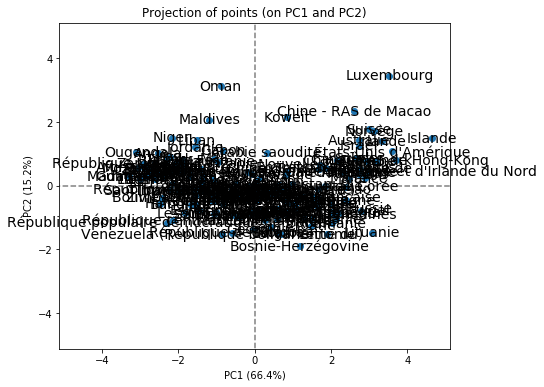

In [334]:
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], labels = X.index)

# plt.savefig('fig8.jpeg')

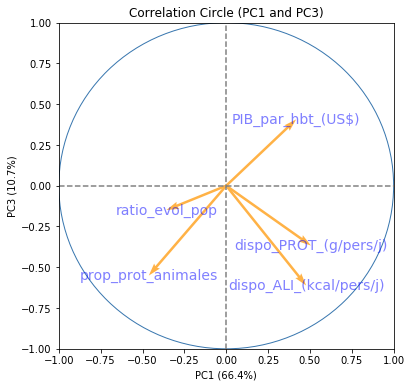

In [335]:
display_circles(pcs, n_comp, pca, [(0,2)], labels = np.array(X.columns))

# plt.savefig('fig9.jpeg')

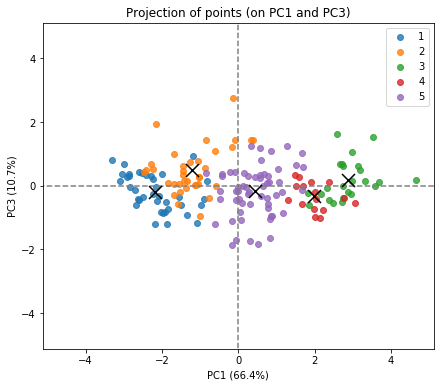

In [336]:
display_factorial_planes(X_projected, n_comp, pca, [(0,2)], illustrative_var = X_c.cluster, alpha = 0.8)
plt.scatter(Xscm_p[:, 0], Xscm_p[:, 2],
            marker='x', s=169, linewidths=3,
            color='k', zorder=10)

# plt.savefig('fig10.jpeg')

---

### Résumé des groupes avec les moyennes des variables

In [337]:
Xscm

,ratio_evol_pop,dispo_PROT_(g/pers/j),prop_prot_animales,dispo_ALI_(kcal/pers/j),PIB_par_hbt_(US$)
cluster,,,,,
1,1.402811,-0.931821,1.131940,-0.896741,-0.609435
2,-0.005538,-0.821688,0.321233,-0.936459,-0.485516
3,-0.431732,1.432537,-1.105197,1.306161,2.053825
4,-1.323756,1.110908,-0.915466,1.052973,0.059696
5,-0.371824,0.221286,-0.231137,0.337815,-0.165687


In [338]:
from pandas.plotting import parallel_coordinates

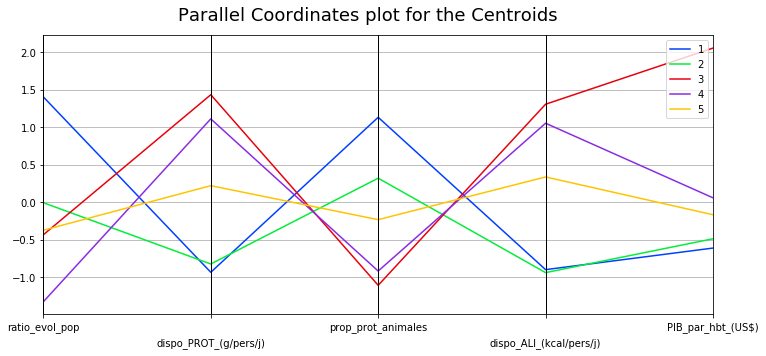

In [339]:
# Représentation des centroides
display_parallel_coordinates_centroids(Xscm.reset_index(), 5)

# plt.savefig('fig11.jpeg')

##### Analyse

_Pour avoir un point de référence : la France se situe dans le groupe 3._ 

- Les groupes 1 et 2 ont les plus faibles dispo ali et les plus faibles PIB.
- Le groupe 3 a la plus faible prop prot ani. 
- Le groupe 4 a le plus faible ratio evol pop. 
- Le groupe 5 a les valeurs les plus constantes. 

=> Nous retenons le groupe 5. 

Text(0.5,0.98,'')

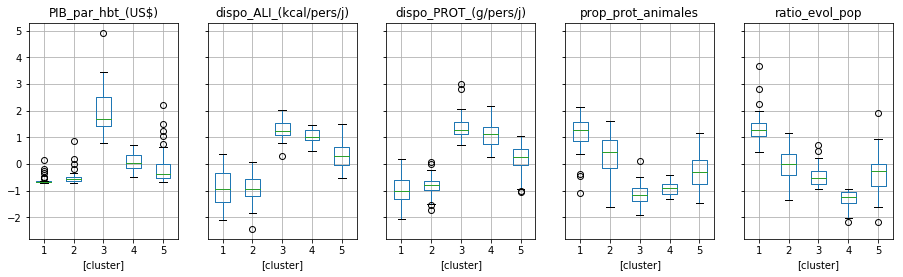

In [340]:
# Boxplots 
X_scaled_clustered.boxplot(by="cluster", figsize=(15,4), layout=(1,5))
plt.suptitle('')

# plt.savefig('fig12.jpeg')

# <font color='#FFCA36'>3. Tests statistiques</font> 

In [344]:
# Rappel du df principal
data.head()

,Code zone,Zone,ratio_evol_pop,dispo_PROT_(g/pers/j),prop_prot_animales,dispo_ALI_(kcal/pers/j),PIB_par_hbt_(US$)
0,1,Arménie,0.016290,97.33,0.542176,3072.0,3933.682101
1,2,Afghanistan,0.124778,54.09,0.804770,1997.0,605.557362
2,3,Albanie,-0.006757,119.50,0.445021,3400.0,4445.132198
3,4,Algérie,0.085187,92.85,0.723209,3345.0,4051.244377
4,7,Angola,0.146103,54.09,0.695507,2266.0,4100.291004


### Visualisation avec seaborn

C:\Users\Zang\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


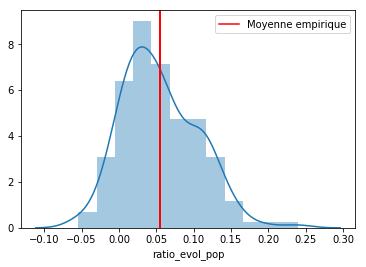

C:\Users\Zang\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


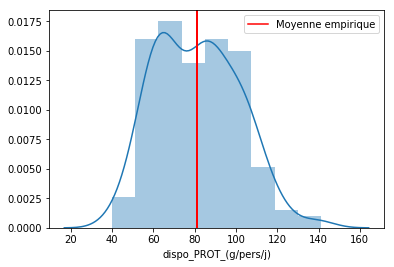

C:\Users\Zang\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


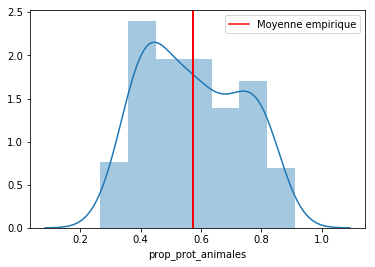

C:\Users\Zang\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


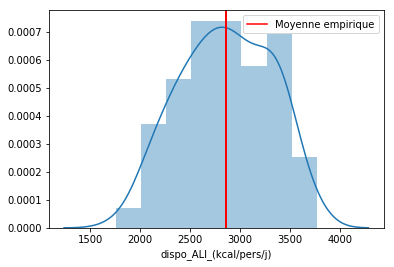

C:\Users\Zang\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


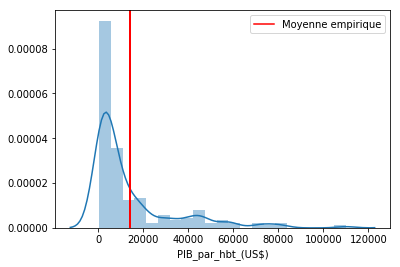

In [345]:
# Visualisation avec seaborn
import matplotlib.lines as mlines
test_norm = data.drop(['Zone','Code zone'], axis=1)

for column in test_norm.columns:
    sns.distplot(test_norm[column])
    xbar=np.mean(test_norm[column]) # calcul de la moyenne
    round(xbar,2)
    plt.axvline(xbar, color='r', linewidth=2)
    plt.legend(handles=[mlines.Line2D([], [], color='red', markersize=15, label="Moyenne empirique")])
    plt.show()
    
# plt.savefig('fig13.jpeg')

=> dispo ali semble le plus se rapprocher d'une variable gaussienne. 

### Recherche de variables gaussiennes

Le test **Kolmogorov-Smirnov** permet de tester l'adéquation à une loi normale.  
Hytpohèse H0 = les variables sont gaussiennes. 

In [346]:
from scipy.stats import ks_2samp

In [349]:
alpha = 0.05

# test_norm = data.drop(['Zone','Code zone'], axis=1)

print(f"alpha = {alpha}\n")

for column in test_norm.columns:
    ks, p = ks_2samp(test_norm[column],list(np.random.normal(np.mean(test_norm[column]), np.std(test_norm[column]), 1000)))
    
    if (p > alpha):
        print(f"{column} : Hypothèse nulle non rejetée. (stat = {ks:.4f}; p-value = {p:.4f})")
    else:
        print(f"{column} : Hypothèse nulle rejetée. (stat = {ks:.4f}; p-value = {p:.4f})")

alpha = 0.05

ratio_evol_pop : Hypothèse nulle non rejetée. (stat = 0.0593; p-value = 0.6666)
dispo_PROT_(g/pers/j) : Hypothèse nulle non rejetée. (stat = 0.0827; p-value = 0.2565)
prop_prot_animales : Hypothèse nulle non rejetée. (stat = 0.0950; p-value = 0.1334)
dispo_ALI_(kcal/pers/j) : Hypothèse nulle non rejetée. (stat = 0.0825; p-value = 0.2592)
PIB_par_hbt_(US$) : Hypothèse nulle rejetée. (stat = 0.2410; p-value = 0.0000)


Test de Shapiro-Wilk pour voir (mais KS préférable car n > 60) :

In [17]:
import scipy

In [351]:
alpha = 0.01

# test_norm = data.drop(['Zone','Code zone'], axis=1)

print(f"alpha = {alpha}\n")

for column in test_norm.columns:
    s, p = scipy.stats.shapiro(test_norm[column])
    
    if (p > alpha):
        print(f"{column} : Hypothèse nulle non rejetée. (stat = {s:.4f}; p-value = {p:.4f})")
    else:
        print(f"{column} : Hypothèse nulle rejetée. (stat = {s:.4f}; p-value = {p:.4f})")

alpha = 0.01

ratio_evol_pop : Hypothèse nulle rejetée. (stat = 0.9751; p-value = 0.0035)
dispo_PROT_(g/pers/j) : Hypothèse nulle non rejetée. (stat = 0.9791; p-value = 0.0109)
prop_prot_animales : Hypothèse nulle rejetée. (stat = 0.9566; p-value = 0.0000)
dispo_ALI_(kcal/pers/j) : Hypothèse nulle non rejetée. (stat = 0.9815; p-value = 0.0216)
PIB_par_hbt_(US$) : Hypothèse nulle rejetée. (stat = 0.7030; p-value = 0.0000)


Je continuerai avec la variable dispo_ALI_(kcal/pers/j)

### Test de comparaison de deux populations gaussiennes

https://openclassrooms.com/fr/courses/4525306-initiez-vous-a-la-statistique-inferentielle/5016619-comparez-deux-echantillons-gaussiens-test-de-comparaison

Pour comparer deux échantillons gaussiens, la méthodologie la plus classique est d'effectuer de manière séquentielle :  
1. Un test d'égalité des variances.
2. Un test d'égalité des moyennes.

In [11]:
X_c.head(1)

,ratio_evol_pop,dispo_PROT_(g/pers/j),prop_prot_animales,dispo_ALI_(kcal/pers/j),PIB_par_hbt_(US$),cluster
Zone,,,,,,
Arménie,0.01629,97.33,0.542176,3072.0,3933.682101,5


In [44]:
clustA = X_c[X_c['cluster'] == 2]['dispo_ALI_(kcal/pers/j)']
clustB = X_c[X_c['cluster'] == 3]['dispo_ALI_(kcal/pers/j)']

In [45]:
# Test de Bartlett (égalité des variances)
scipy.stats.bartlett(clustA,clustB)

BartlettResult(statistic=1.6563366720683144, pvalue=0.1980986657698293)

La p-valeur valant plus de 0.05, **on ne rejette donc pas l’égalité des variances au niveau de test 5%.**

In [27]:
from scipy import stats

In [28]:
# Test de Student (égalité des moyennes)
stats.ttest_ind(clustA, clustB, equal_var=True)

Ttest_indResult(statistic=-17.81446921489302, pvalue=3.4203190867962722e-25)

La p-valeur valant moins de 0.05, **on rejette l'hypothèse H0 d'égalité des moyennes aux niveaux de test usuels.**  
Cela nous permet de rejetter que les clusters en question suivent la même distribution.  
**Cela montre que nos groupes diffèrents réellement.** 

_**NB**  
Si les variances ne sont pas considérées comme égales, les deux échantillons n'ont pas la même loi. Si les variances sont considérées comme égales, il est alors possible d'estimer cette variance sur les deux échantillons à la fois, et de tester l'égalité des moyennes en utilisant cette variance empirique globale.Notons qu'il est néanmoins possible d'effectuer un test de comparaison des moyennes sous hypothèse de variances différentes. Il ne s'agit pas d'une comparaison des lois, mais alors d'une comparaison simple des moyennes._

------

##### Calcul des moyennes et des variances (juste pour voir)

In [29]:
# Calcul de la moyenne et de la variance du 1er échantillon
clustAmean = np.mean(clustA)
clustAvar= np.var(clustA)
clustAmean, clustAvar

(2433.972222222222, 54060.02700617284)

In [30]:
# Calcul de la moyenne et de la variance de l'échantillon 1
clustBmean = np.mean(clustB)
clustBvar= np.var(clustB)
clustBmean, clustBvar

(3450.375, 32193.067708333332)

------

# <font color='#FFCA36'>4. Réduction du nombre de pays</font> 

In [35]:
(X_c
         # Je sélectionne le cluster qui m'intéresse
         .query('cluster == 5')
         
         # Sélection des PIB les plus élevés
         .sort_values(by='ratio_evol_pop', ascending=False)
 
          # Réduction du nb de pays
         .head(8)
)

,ratio_evol_pop,dispo_PROT_(g/pers/j),prop_prot_animales,dispo_ALI_(kcal/pers/j),PIB_par_hbt_(US$),cluster
Zone,,,,,,
"Chine, Taiwan Province de",0.010800,85.71,0.504609,2976.0,57500.000000,5
Nouvelle-Zélande,0.040615,90.80,0.428084,3153.0,43651.468216,5
Japon,-0.006324,86.52,0.444637,2699.0,38121.908661,5
Nouvelle-Calédonie,0.048849,83.12,0.419153,2750.0,34239.202596,5
Koweït,0.150218,99.69,0.524426,3445.0,28897.241961,5
Chypre,0.031308,80.20,0.430673,2612.0,26473.007605,5
Arabie saoudite,0.101461,87.51,0.577191,3194.0,20905.391689,5
Polynésie française,0.021359,97.51,0.337196,2917.0,20091.185754,5


In [33]:
# Si l'on veut réduire encore : 
(X_c
         # Je sélectionne le cluster qui m'intéresse
         .query('cluster == 5')
         
         # Classsement par PIB
         .sort_values(by='ratio_evol_pop', ascending=False)
 
         # Réduction à 5 pays
         .head(5)
 
         # Je classe par ratio evol pop
         .sort_values(by='PIB_par_hbt_(US$)', ascending=False)
)

,ratio_evol_pop,dispo_PROT_(g/pers/j),prop_prot_animales,dispo_ALI_(kcal/pers/j),PIB_par_hbt_(US$),cluster
Zone,,,,,,
Koweït,0.150218,99.69,0.524426,3445.0,28897.241961,5
Arabie saoudite,0.101461,87.51,0.577191,3194.0,20905.391689,5
Algérie,0.085187,92.85,0.723209,3345.0,4051.244377,5
Égypte,0.090922,96.27,0.750182,3315.0,2000.297246,5
Kirghizistan,0.079987,85.28,0.595216,2796.0,1274.241408,5


On arrive finalement à un groupe de 5 pays.